# Introduzione ai Modelli SEM {#sec-sem-intro}

Dopo aver esaminato in dettaglio l'analisi fattoriale, sia esplorativa che confermativa, il presente capitolo si immerge nei Modelli di Equazioni Strutturali (SEM). Tipicamente, un modello SEM è articolato in due parti principali: la parte di misurazione, che collega le variabili latenti a un insieme di variabili osservate o indicatori, e la parte strutturale, che modella le relazioni ipotizzate tra queste variabili latenti.

Il punto focale dei SEM è quello di testare teorie specifiche mediante la specificazione di un modello che rappresenti le predizioni di queste teorie, impiegando costrutti plausibili misurati con variabili osservate adeguate. In questo contesto, i SEM fungono da collegamento essenziale tra la teoria e l'osservazione, facilitando la traduzione di concetti astratti in entità misurabili e l'analisi delle loro interrelazioni in un modo strutturato e teoricamente valido.

Tuttavia, è cruciale mantenere un approccio critico nell'uso dei SEM. Come ogni modello statistico, i SEM si basano su semplificazioni e approssimazioni della realtà. Ciò rispecchia il noto detto: "Tutti i modelli sono sbagliati, ma alcuni sono utili". Questa espressione enfatizza l'importanza di riconoscere che, benché un modello possa mostrare un buon adattamento ai dati, non è necessariamente una rappresentazione fedele della realtà.

Spesso, modelli notevolmente imprecisi possono comunque adattarsi bene ai dati, portando a conclusioni inesatte o fuorvianti. Pertanto, la selezione dei modelli diventa più di un semplice esercizio statistico; è un processo di sviluppo e raffinamento di teorie più robuste. La critica e la revisione dei modelli, basate su evidenze empiriche e riflessioni teoriche, sono quindi elementi fondamentali del processo scientifico nelle scienze sociali e psicologiche.

In conclusione, i SEM offrono strumenti potenti per l'analisi e l'interpretazione dei dati in psicologia. Tuttavia, il loro impiego esige un equilibrio attento tra comprensione teorica, competenza statistica e spirito critico. Con un approccio consapevole e ben informato, i SEM possono svolgere un ruolo significativo nello sviluppo della ricerca psicologica, conducendo a una comprensione più profonda dei fenomeni studiati.

In [3]:
source("../_common.R")
suppressPackageStartupMessages({
    library("lavaanExtra")
    library("psych")
    library("tidyr")
    library("knitr")
    library("mvnormalTest")
    library("semPlot")
    library("DiagrammeRsvg")
    library("rsvg")
    library("effectsize")
})
set.seed(42)

Per introdurre i modelli SEM iniziamo a considerare il caso più semplice, ovvero il modello di regressione multipla espresso come un modello di equazioni strutturali. Utilizzeremo un campione di dati reali e ci concentreremo sulle 3 sottoscale del DASS-21: ansia, stress e depressione. Il campione è costituito da 526 studenti universitari di psicologia.

In [36]:
dat <- read.csv("../data/dass_rosenberg_scs.csv", header = TRUE)
dat |>
    head()

,stress,anxiety,depression,rosenberg,self_kindness,common_humanity,mindfulness,self_judgment,isolation,over_identification,scs_ts
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,7,6,4,31,17,16,16,11,8,10,98
2,3,2,1,32,14,14,16,16,11,13,82
3,1,0,1,31,20,16,16,13,6,9,102
4,12,11,13,34,12,6,6,10,7,15,70
5,10,6,12,25,16,17,13,17,16,18,73
6,5,1,2,31,14,14,10,12,8,11,85


In [37]:
dim(dat)

[1] 526  11

Esaminiamo i diagrammi di dispersione tra le varie misure presenti nel campione per verificare che la relazione tra le variabili sia lineare.

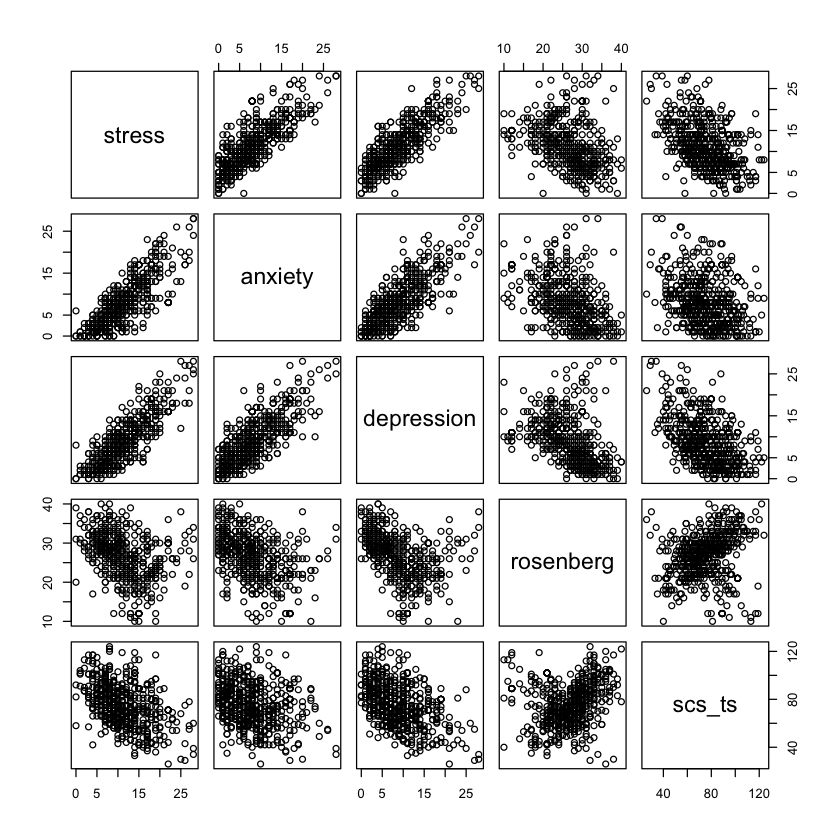

In [38]:
d_mr <- dat |>
    dplyr::select(stress, anxiety, depression, rosenberg, scs_ts)

pairs(d_mr)

In [39]:
y <- d_mr$scs_ts |> as.matrix()
dim(y)

[1] 526   1

### Modello di Regressione Lineare Multipla

Il modello generale di regressione lineare multipla (MLR) si esprime attraverso la seguente equazione:

$$
y_i = \beta_0 + \beta_1 x_{1i} + \cdots + \beta_p x_{pi} + \epsilon_i 
$$

dove:
- $i = 1, \ldots, N$ indica l'$i$-esima osservazione,
- $\beta_0$ è l'intercetta del modello,
- $\beta_1, \ldots, \beta_p$ sono i coefficienti di regressione associati a ciascuna variabile indipendente,
- $\epsilon_i$ è il termine di errore associato all'$i$-esima osservazione,
- Si presume che il termine di errore sia indipendente dalle variabili esplicative $X_s$.

In questa formula, ogni $y_i$ rappresenta il valore della variabile dipendente per l'$i$-esima osservazione, i coefficienti $\beta$ quantificano l'impatto di ogni variabile indipendente sulla variabile dipendente, e $\epsilon_i$ rappresenta l'errore o la varianza non spiegata nella previsione di $y_i$. Questa struttura consente di modellare relazioni lineari tra una variabile dipendente e più variabili indipendenti.

Il modello MLR può essere rappresentato anche in forma matriciale come segue:

$$
y = X\beta + \epsilon
$$

dove:
- $y$ è un vettore $N \times 1$ dei valori osservati della variabile risposta,
- $X$ è una matrice di progettazione $N \times (p+1)$ che incorpora tutte le $p$ variabili indipendenti e una colonna di uno per l'intercetta,
- $\beta$ è un vettore di dimensione $(p+1)$ che contiene i parametri di regressione, inclusa l'intercetta,
- $\epsilon$ rappresenta il vettore dei termini di errore.

La matrice $X$ e i vettori $y$ e $\epsilon$ sono definiti nel modo seguente:

$$
y = 
\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_N
\end{pmatrix}, \quad
\epsilon = 
\begin{pmatrix}
\epsilon_1 \\
\epsilon_2 \\
\vdots \\
\epsilon_N
\end{pmatrix}, \quad
X = 
\begin{pmatrix}
1 & x_{11} & \cdots & x_{p1} \\
1 & x_{12} & \cdots & x_{p2} \\
\vdots & \vdots & \ddots & \vdots \\
1 & x_{1N} & \cdots & x_{pN}
\end{pmatrix}
$$

Ogni riga di $X$ corrisponde a un'osservazione e include i valori delle variabili indipendenti per quella osservazione più un uno per l'intercetta.

### Metodo dei Minimi Quadrati

Il metodo dei minimi quadrati (LSE) mira a trovare i parametri $\beta$ che minimizzano la somma dei quadrati degli errori, espressa come:

$$
\text{SSE} = \epsilon_i^2 = \epsilon' \epsilon = (y - X\beta)'(y - X\beta) = y'y - 2\beta'X'y + \beta'X'X\beta
$$

Minimizzando la SSE rispetto a $\beta$ e impostando la derivata pari a zero, si ottiene:

$$
X'X\hat{\beta} = X'y
$$

Se la matrice $X'X$ è invertibile, la soluzione è:

$$
\hat{\beta} = (X'X)^{-1}X'y
$$

Questa procedura di minimizzazione degli errori al quadrato è essenziale per determinare i coefficienti che descrivono al meglio la relazione tra le variabili indipendenti e la variabile dipendente, minimizzando la discrepanza tra i valori osservati e quelli predetti dal modello.

Ora, esaminiamo queste relazioni utilizzando i dati specifici a disposizione.

In [40]:
dass <- d_mr |>
    dplyr::select(depression, anxiety, stress)

In [41]:
X <- model.matrix(~ depression + anxiety + stress, data = dass)
head(X)

,(Intercept),depression,anxiety,stress
1,1,4,6,7
2,1,1,2,3
3,1,1,0,1
4,1,13,11,12
5,1,12,6,10
6,1,2,1,5


In [42]:
beta <- solve(t(X) %*% X) %*% t(X) %*% y
print(beta)

                  [,1]
(Intercept) 91.3611064
depression  -1.4841573
anxiety      1.0493140
stress      -0.9733368


Verifichiamo i calcoli eseguiti usando la funzione `lm()`:

In [43]:
fm <- lm(scs_ts ~ depression + anxiety + stress, data = d_mr)
print(coef(fm))

(Intercept)  depression     anxiety      stress 
 91.3611064  -1.4841573   1.0493140  -0.9733368 


I valori predetti sono calcolati come:

In [44]:
yhat <- X %*% beta
cor(yhat, fm$fitted.values) |> print()

     [,1]
[1,]    1


I residui si ottengono nel modo seguente:

In [45]:
e <- d_mr$scs_ts - yhat
cor(e, fm$res) |> print()

     [,1]
[1,]    1


La somma dei quadrati dei residui (Residual Sum of Squares, RSS) è definita nel modo seguente:

In [48]:
RSS <- t(e) %*% e
print(RSS)

         [,1]
[1,] 128699.9


La stima della varianza dei residui è data da:

In [49]:
var_e <- RSS / (length(y) - dim(X)[2])
print(var_e)

         [,1]
[1,] 246.5515


dove al denominatore abbiamo i gradi di libertà.

L'errore standard della regressione è dunque dato da:

In [50]:
sqrt(var_e) |> print()

         [,1]
[1,] 15.70196


Verifichiamo:

In [51]:
summary(fm)


Call:
lm(formula = scs_ts ~ depression + anxiety + stress, data = d_mr)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.803 -12.000  -0.348  10.739  43.669 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  91.3611     1.6231  56.288  < 2e-16 ***
depression   -1.4842     0.2376  -6.247 8.69e-10 ***
anxiety       1.0493     0.2103   4.990 8.22e-07 ***
stress       -0.9733     0.2553  -3.813 0.000154 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.7 on 522 degrees of freedom
Multiple R-squared:  0.247,	Adjusted R-squared:  0.2426 
F-statistic: 57.06 on 3 and 522 DF,  p-value: < 2.2e-16


Infine, il coefficiente di determinazione nel modello di regressione multipla ha la stessa definizione di quello incontrato nella regressione bivariata:

In [52]:
R2 <- (sum((yhat - mean(y))^2)) / (sum((y - mean(y))^2)) 
R2

[1] 0.2469619

### Modello di Percorso

Formuliamo ora il modello di regressione multipla nei termini di un modello SEM.

In [53]:
mod_mr <- "
  scs_ts ~ anxiety + depression + stress
"

Adattiamo il modello ai dati usando `lavaan`:

In [54]:
fit_mr <- lavaan::sem(mod_mr, d_mr)

Esaminiamo i parametri ottenuti in questo modo:

In [55]:
parameterEstimates(fit_mr) |> print()

          lhs op        rhs     est     se      z pvalue ci.lower ci.upper
1      scs_ts  ~    anxiety   1.049  0.209  5.010      0    0.639    1.460
2      scs_ts  ~ depression  -1.484  0.237 -6.271      0   -1.948   -1.020
3      scs_ts  ~     stress  -0.973  0.254 -3.827      0   -1.472   -0.475
4      scs_ts ~~     scs_ts 244.677 15.087 16.217      0  215.106  274.247
5     anxiety ~~    anxiety  32.082  0.000     NA     NA   32.082   32.082
6     anxiety ~~ depression  24.546  0.000     NA     NA   24.546   24.546
7     anxiety ~~     stress  24.538  0.000     NA     NA   24.538   24.538
8  depression ~~ depression  31.418  0.000     NA     NA   31.418   31.418
9  depression ~~     stress  25.662  0.000     NA     NA   25.662   25.662
10     stress ~~     stress  29.714  0.000     NA     NA   29.714   29.714


Si noti che i parametri stimati da `lavaan` sono praticamente identici a quelli trovati con il metodo della massima verosimiglianza.

### Path Analysis e Scomposizione della Covarianza

L'obiettivo principale dei modelli SEM (Structural Equation Modeling) è quello di identificare coefficienti di percorso che permettano di ricostruire le covarianze osservate nel modello. Questo viene fatto attraverso la somma degli effetti diretti e indiretti, come specificato dal modello. Per esemplificare, consideriamo la covarianza tra il punteggio totale di self-compassion e il livello di ansia, come indicato dal DASS-21.

In questo contesto, l'effetto diretto si riferisce alla relazione diretta tra ansia e auto-compassione. Tuttavia, ci sono anche effetti indiretti che contribuiscono a questa relazione. Uno di questi effetti indiretti proviene dalla covarianza tra ansia e depressione, combinata con l'influenza della depressione sull'auto-compassione. Un altro effetto indiretto deriva dalla covarianza tra ansia e stress, combinata con l'effetto dello stress sull'auto-compassione.

In sostanza, nel modello SEM, la covarianza totale tra self-compassion e ansia è quindi una funzione:
1. Dell'effetto diretto dell'ansia sull'auto-compassione.
2. Dell'effetto combinato di ansia e depressione sull'auto-compassione.
3. Dell'effetto combinato di ansia e stress sull'auto-compassione.

Questi effetti vengono calcolati e sommati per fornire una stima complessiva della covarianza tra i due costrutti, offrendo una visione più olistica e dettagliata delle dinamiche psicologiche in gioco.

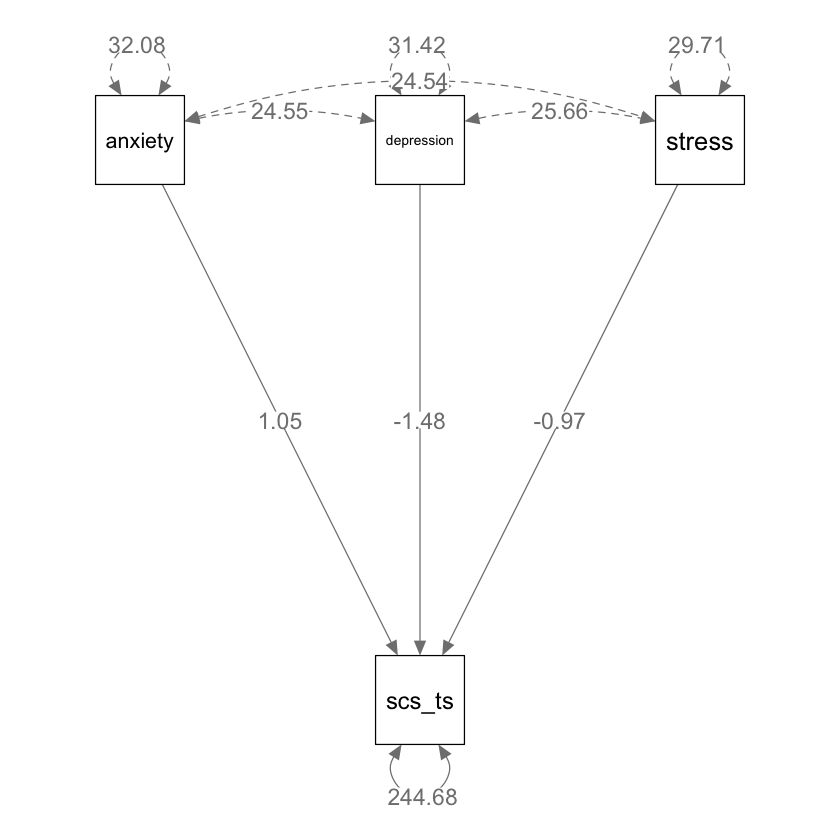

In [56]:
semPaths(fit_mr,
    whatLabels = "est",
    sizeMan = 10,
    edge.label.cex = 1.15,
    style = "mx",
    nCharNodes = 0, nCharEdges = 0
)

In [57]:
# Coefficients from the model
beta_anxiety_scs_ts <- 1.0493140 # Coefficient for anxiety predicting scs_ts
beta_depression_scs_ts <- -1.4841573 # Coefficient for depression predicting scs_ts
beta_stress_scs_ts <- -0.9733368 # Coefficient for stress predicting scs_ts

# Covariances from the model
cov_anxiety_depression <- 24.5464225
cov_anxiety_stress <- 24.5381096
cov_depression_stress <- 25.6615608

# Assuming the variances of anxiety, depression, and stress
var_anxiety <- 32.0817418
var_depression <- 31.4182365
var_stress <- 29.7137880

# Predicted covariance between anxiety and scs_ts
predicted_cov_anxiety_scs_ts <- 
    beta_anxiety_scs_ts * var_anxiety +
    beta_depression_scs_ts * cov_anxiety_depression +
    beta_stress_scs_ts * cov_anxiety_stress

# Output the predicted covariance
print(predicted_cov_anxiety_scs_ts)


[1] -26.65078


Verifichiamo:

In [58]:
cov(d_mr$anxiety, d_mr$scs_ts)

[1] -26.70154

Lo stesso procedimento si usa per le altre componenti della matrice di varianza/covarianza dei dati.

## Errore di Specificazione

Spiritosamente chiamato "heartbreak of L.O.V.E." [Left-Out Variable Error; {cite:t}`mauro1990understanding`], l'errore di specificazione è una caratteristica fondamentale dei modelli di regressione che deve sempre essere tenuta a mente quando interpretiamo i risultati di questa tecnica di analisi statistica. 

L'errore di specificazione si verifica quando escludiamo dal modello di regressione una variabile che ha due caratteristiche:

- è associata con altre variabili inserite nel modello,
- ha un effetto diretto sulla $y$.

Come conseguenza dell'errore di specificazione, l'intensità e il segno dei coefficienti parziali di regressione risultano sistematicamente distorti.

Consideriamo un esempio con dati simulati nei quali immaginiamo che la prestazione sia positivamente associata alla motivazione e negativamente associata all'ansia. Immaginiamo inoltre che vi sia una correlazione positiva tra ansia a motivazione. Ci chiediamo cosa succede al coefficiente parziale della variabile "motivazione" se la variabile "ansia" viene esclusa dal modello di regressione.

In [26]:
set.seed(123)
n <- 400
anxiety <- rnorm(n, 10, 1.5)
motivation <- 4.0 * anxiety + rnorm(n, 0, 3.5)
cor(anxiety, motivation)

[1] 0.8617706

Creiamo la variabile `performance` come una combinazione lineare di motivazione e ansia nella quale la motivazione ha un effetto piccolo, ma positivo, sulla prestazione, e l'ansia ha un grande effetto negativo sulla prestazione:

In [27]:
performance <-  0.5 * motivation - 5.0 * anxiety + rnorm(n, 0, 3)

Salviamo i dati in un data frame:

In [28]:
sim_dat2 <- tibble(performance, motivation, anxiety)
sim_dat2 |>
    head()

performance,motivation,anxiety
<dbl>,<dbl>,<dbl>
-26.53773,36.37970,9.159287
-32.98337,34.52866,9.654734
-35.55939,47.13063,12.338062
-26.90895,40.32210,10.105763
-28.57925,43.12316,10.193932
-40.17393,44.51348,12.572597


Eseguiamo l'analisi di regressione specificando il modello in maniera corretta, ovvero usando come predittori l'ansia e la depressione:

In [29]:
fm1 <- lm(performance ~ motivation + anxiety, sim_dat2)

Le stime dei coefficienti parziali di regressione recuperano correttamente l'intensità e il segno dei coefficienti utilizzati nel modello generatore dei dati:

In [30]:
print(coef(fm1))

(Intercept)  motivation     anxiety 
  1.3711965   0.4953886  -5.1052176 


Eseguiamo ora l'analisi di regressione ignorando il predittore `anxiety` che ha le due caratteristiche di essere associato a `motivation` e di avere un effetto diretto sulla prestazione:

In [31]:
fm2 <- lm(performance ~ motivation, sim_dat2)
summary(fm2) 


Call:
lm(formula = performance ~ motivation, data = sim_dat2)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.501  -3.409   0.005   3.311  12.616 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -12.39720    1.44591  -8.574 2.24e-16 ***
motivation   -0.43717    0.03553 -12.305  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.866 on 398 degrees of freedom
Multiple R-squared:  0.2756,	Adjusted R-squared:  0.2738 
F-statistic: 151.4 on 1 and 398 DF,  p-value: < 2.2e-16


Si noti che il risultato prodotto dal modello di regressione è totalmente sbagliato: come conseguenza dell'errore di specificazione, il segno del coefficiente parziale di regressione della variabile "motivazione" è negativo, anche se nel modello generatore dei dati tale coefficiente aveva il segno opposto. 

Quindi, se interpretassimo il coefficiente parziale ottenuto in termini casuali, saremmo portati a concludere che la motivazione fa diminuire la prestazione. Ma in realtà è vero l'opposto.

È facile vedere perché si verifica l'errore di specificazione. Supponiamo che il vero modello sia

$$
y = \alpha + \beta_1 X_1 + \beta_2 X_2 + \varepsilon
$$

il quale verrebbe stimato da

$$
y = a + b_1 X_1 + b_2 X_2 + e.
$$

Supponiamo però che il ricercatore creda invece che

$$
y = \alpha^\prime + \beta_1^\prime X_1 + \varepsilon^\prime
$$

e quindi stimi

$$
y = a^\prime + b_1^\prime X_1 + e^\prime
$$

omettendo $X_2$ dal modello. 

Per capire che relazione intercorre tra $b_1^\prime$ e $b_1$, iniziamo a scrivere la formula per $b_1^\prime$:

$$
\begin{equation}
b_1^\prime = \frac{Cov(X_1, Y)}{Var(X_1)}.
\end{equation}
$$

Sviluppando, otteniamo

$$
\begin{equation}
\begin{aligned}
b_1^\prime &= \frac{Cov(X_1, a + b_1 X_1 + b_2 X_2 + e)}{Var(X_1)}\notag\\
&= \frac{Cov(X_1, a)+b_1 Cov(X_1, X_1) + b_2 Cov(X_1, X_2) + Cov(X_1, e)}{Var(X_1)}\notag\\
&= \frac{0 + b_1 Var(X_1) + b_2 Cov(X_1, X_2) + 0}{Var(X_1)}\notag\\
&= b_1 + b_2 \frac{Cov(X_1, X_2)}{Var(X_1)}.
\end{aligned}
\end{equation}
$$

Quindi, se erroneamente omettiamo $X_2$ dal modello, abbiamo che

$$
\begin{equation}
\mathbb{E}(b_1^\prime) = \beta_1 + \beta_2 \frac{\sigma_{12}}{\sigma_1^2}.
\end{equation}
$$(eq-specific-err)

Verifichiamo tale conclusione per i dati dell'esempio che stiamo discutendo. Nel caso presente, $X_1$ è `motivation` e $X_2$ è `anxiety`. Applicando l'eq. {eq}`eq-specific-err` otteniamo lo stesso valore per il coefficiente di regressione associato a `motivation` che era stato ottenuto adattando ai dati il modello `performance ~ motivation`:

In [32]:
fm1$coef[2] +  fm1$coef[3] * 
  cov(sim_dat2$motivation, sim_dat2$anxiety) / 
  var(sim_dat2$motivation)

motivation 
-0.4371675

Possiamo dunque concludere che $b_1^\prime$ è uno stimatore distorto di $\beta_1$. Si noti che questa distorsione non scompare all'aumentare della numerosità campionaria, il che (in termini statistici) significa che un tale stimatore è _inconsistente_. Quello che succede in pratica è che alla variabile $X_1$ vengono attribuiti gli effetti delle variabili che sono state omesse dal modello. Si noti che una tale distorsione sistematica di $b_1^\prime$ può essere evitata solo se si verificano due condizioni:

- $\beta_2 = 0$. Questo è ovvio, dato che, se $\beta_2 = 0$, ciò significa che il modello non è specificato in modo errato, cioè $X_2$ non appartiene al modello perché non ha un effetto diretto sulla $Y$.
-  $\sigma_{12} = 0$. Cioè, se $X_1$ e $X_2$ sono incorrelate, allora l'omissione di una delle due variabili non comporta stime distorte dell'effetto dell'altra.

### Soppressione

Le conseguenze dell'errore di specificazione sono chiamate "soppressione" (_suppression_). In generale, si ha soppressione quando (1) il valore assoluto del peso beta di un predittore è maggiore di quello della sua correlazione bivariata con il criterio o (2) i due hanno segni opposti. 

- L'esempio descritto sopra è un caso di _soppressione negativa_, dove il predittore ha correlazioni bivariate positive con il criterio, ma si riceve un peso beta negativo nell'analisi di regressione multipla. 
- Un secondo tipo di soppressione è la _soppressione classica_, in cui un predittore non è correlato al criterio ma riceve un peso beta diverso da zero. 
- C'è anche la _soppressione reciproca_ che può verificarsi quando due variabili sono correlate positivamente con il criterio ma negativamente tra loro.

### Regressione Stepwise

Nel contesto della regressione, è importante comprendere che i predittori non dovrebbero essere selezionati basandosi unicamente sulle loro correlazioni bivariate con la variabile dipendente (il criterio). Queste correlazioni, note come associazioni di "ordine zero", non tengono conto dell'influenza degli altri predittori. Di conseguenza, i valori delle correlazioni bivariate possono risultare fuorvianti quando si considerano i coefficienti di regressione parziale per le stesse variabili.

La significatività statistica delle correlazioni bivariate con la variabile dipendente non è un criterio affidabile per la selezione dei predittori. Questo perché tali correlazioni non considerano gli effetti complessivi degli altri predittori nel modello.

Le procedure di selezione automatica dei predittori, come quelle impiegate nelle regressioni stepwise, possono essere seducenti per la loro facilità d'uso. Tuttavia, queste procedure sono rischiose. Anche piccole non-linearità o effetti indiretti tra i predittori, che potrebbero non essere immediatamente evidenti, possono distorcere in modo significativo i coefficienti di regressione parziale. 

Invece di affidarsi a metodi automatici, è preferibile selezionare un numero limitato di predittori basandosi su considerazioni teoriche o sui risultati di ricerche precedenti. Questo approccio più ponderato aiuta a evitare le distorsioni che possono emergere dall'uso di procedure di selezione automatica.

Una volta che sono stati selezionati, i predittori possono essere inseriti nell'equazione di regressione in due modi diversi: 

- tutti i predittori possono essere inseriti nel modello contemporaneamente;
- i predittori possono essere inseriti nel modello sequenzialmente, mediante una serie di passaggi. 

L'ordine di ingresso può essere determinato in base a standard: teorici (razionali) o empirici (statistici). Lo standard razionale corrisponde alla *regressione gerarchica*, in cui si comunica al computer un ordine fisso per inserire i predittori. Ad esempio, a volte le variabili demografiche vengono inserite nel primo passaggio, quindi nel secondo passaggio viene inserita una variabile psicologica di interesse. Questo ordine non solo controlla le variabili demografiche ma permette anche di valutare il potere predittivo della variabile psicologica, al di là di quello delle semplici variabili demografiche. Quest'ultimo può essere stimato come l'aumento della correlazione multipla al quadrato, o $\Delta R^2$, da quella della fase 1 con solo predittori demografici a quella della fase 2 con tutti i predittori nell'equazione di regressione.

Un esempio di standard statistico è la regressione _stepwise_, in cui il computer seleziona l'inserimento dei predittori in base esclusivamente alla significatività statistica; cioè, viene chiesto: quale predittore, se inserito nell'equazione, avrebbe il valore_$p$ più piccolo per il test del suo coefficiente di regressione parziale? Dopo la selezione, i predittori in una fase successiva possono essere rimossi dall'equazione di regressione in base ai loro valori-$p$ (ad esempio, se $p \geq$ .05). Il processo stepwise si interrompe quando, aggiungendo più predittori, $\Delta R^2$ non migliora. Varianti della regressione stepwise includono _forward inclusion_, in cui i predittori selezionati non vengono successivamente rimossi dal modello, e _backward elimination_, che inizia con tutti i predittori nel modello per poi rimuoverne alcuni in passi successivi. Per le ragioni descritte nel paragrafo sull'errore di specificazione, i metodi basati sulle procedure di stepwise regression non dovrebbero mai essere usati. Infatti, i problemi relativi a tale procedura sono così gravi che varie riviste non accettano studi che fanno uso di una tale tecnica statistica. I risultati ottenuti con tali metodi, infatti, sono quasi certamente non replicabili in campioni diversi.

Una considerazione finale riguarda l'idea di rimuovere i predittori "non significativi" dal modello di regressione. Questa è una cattiva idea. Il ricercatore non deve sentirsi in dovere di trascurare quei predittore che non risultano "statisticamente significativi". In campioni piccoli, la potenza dei test di significatività è  bassa e la rimozione di un predittore non significativo può alterare sostanzialmente la soluzione. Se c'è una buona ragione per includere un predittore, allora è meglio lasciarlo nel modello, fino a prova contraria. In termini generali, qualsiasi considerazione basata sulla "significatività statistia" è fuorviante.

## Oltre la Regressione Multipla: L'Uso dei Modelli SEM

Analizziamo un esempio in cui il modello di Equazioni Strutturali (SEM) viene impiegato per studiare la relazione tra autocompassione e malessere psicologico, utilizzando come indicatori le sotto-scale della DASS-21 (Depressione, Ansia, Stress) e della Self-Compassion Scale. In questo contesto, definiamo due variabili latenti: "malessere psicologico" e "autocompassione". La variabile latente "malessere psicologico" è composta dalle tre sotto-scale della DASS-21, mentre la variabile "autocompassione" è formata dalle sei sotto-scale della Self-Compassion Scale.

Il modello strutturale esplora la relazione tra queste due variabili latenti. L'autocompassione è considerata una variabile esogena, ipotizzata come un fattore di protezione che riduce il malessere psicologico, che a sua volta è trattato come variabile endogena. L'ipotesi principale del modello è che esista una relazione di regressione negativa tra autocompassione e malessere psicologico, indicando che livelli più elevati di autocompassione sono associati a minori livelli di malessere psicologico.

Un elemento chiave dei modelli SEM è la gestione dell'errore di misurazione. Le variabili latenti sono progettate per riflettere il nucleo vero dei costrutti teorici, in questo caso autocompassione e malessere psicologico, isolando gli effetti degli errori di misurazione che possono affliggere gli indicatori osservati. Questo approccio consente di esaminare la "vera" relazione tra i costrutti, eliminando le distorsioni introdotte dagli errori di misurazione nelle misure osservate.

La capacità del modello SEM di separare la variabilità attribuibile ai costrutti latenti da quella dovuta agli errori di misurazione aumenta l'accuratezza e l'affidabilità dell'analisi. Questo è particolarmente vantaggioso in campi come la psicologia, dove i costrutti teorici non sono direttamente osservabili e devono essere inferiti attraverso misure potenzialmente errate.

In [59]:
mod_sc <- "
  F =~ anxiety + depression + stress
  SC =~ self_kindness	+ common_humanity	+ mindfulness	+ self_judgment	+ isolation	+ over_identification
  F ~ SC 
"

Adattiamo il modello ai dati.

In [60]:
fit_sc <- lavaan::sem(mod_sc, dat, std.lv = TRUE)

Esaminiamo la soluzione ottenuta.

In [61]:
standardizedSolution(fit_sc) |> print()

                   lhs op                 rhs est.std    se       z pvalue
1                    F =~             anxiety   0.847 0.014  58.505      0
2                    F =~          depression   0.909 0.011  82.503      0
3                    F =~              stress   0.929 0.010  91.945      0
4                   SC =~       self_kindness   0.757 0.022  33.984      0
5                   SC =~     common_humanity   0.621 0.030  20.695      0
6                   SC =~         mindfulness   0.689 0.026  26.235      0
7                   SC =~       self_judgment  -0.770 0.022 -35.799      0
8                   SC =~           isolation  -0.770 0.022 -35.822      0
9                   SC =~ over_identification  -0.767 0.022 -35.416      0
10                   F  ~                  SC  -0.476 0.038 -12.385      0
11             anxiety ~~             anxiety   0.282 0.025  11.495      0
12          depression ~~          depression   0.173 0.020   8.633      0
13              stress ~~

1. **Saturazioni Fattoriali (Loadings) per le Variabili Latenti:**
   - **F:** Le variabili osservate "anxiety", "depression", e "stress" hanno elevate saturazioni fattoriali sulla variabile latente "F". Questo suggerisce che ciascuna di queste misure è un buon indicatore della variabile latente "F".
   - **SC:** Le variabili "self_kindness", "common_humanity", "mindfulness", "self_judgment", "isolation", e "over_identification" hanno anch'esse significative saturazioni sulla variabile latente "SC". Si noti che "self_judgment", "isolation", e "over_identification" hanno saturazioni negative, indicando che queste variabili sono inversamente associate con "SC".

2. **Regressione tra Variabili Latenti:**
   - La relazione di regressione tra "F" e "SC" mostra un coefficiente negativo (-0.48), il che indica una relazione inversa tra queste due variabili latenti. Questo significa che livelli più alti di "SC" sono associati a livelli più bassi di "F".

3. **Varianza delle Variabili Latenti:**
   - La varianza di "F" e "SC" indica quanto della variazione nelle variabili latenti è spiegata dai loro rispettivi indicatori. La varianza di "F" (0.77) è relativamente alta, suggerendo che gli indicatori spiegano una buona parte della varianza in "F". La varianza di "SC" è fissata a 1, un approccio comune per identificare il modello.

4. **Varianze Residue degli Indicatori:**
   - Le varianze residue (ad esempio, "anxiety ~~ anxiety") rappresentano la varianza non spiegata in ciascun indicatore dalle variabili latenti. Valori più bassi indicano che la variabile latente spiega una maggior parte della varianza dell'indicatore. Ad esempio, "anxiety" ha una varianza residua di 0.28, suggerendo che "F" spiega una buona parte, ma non tutta, della varianza in "anxiety".

Generiamo una rappresentazione grafica del modello.

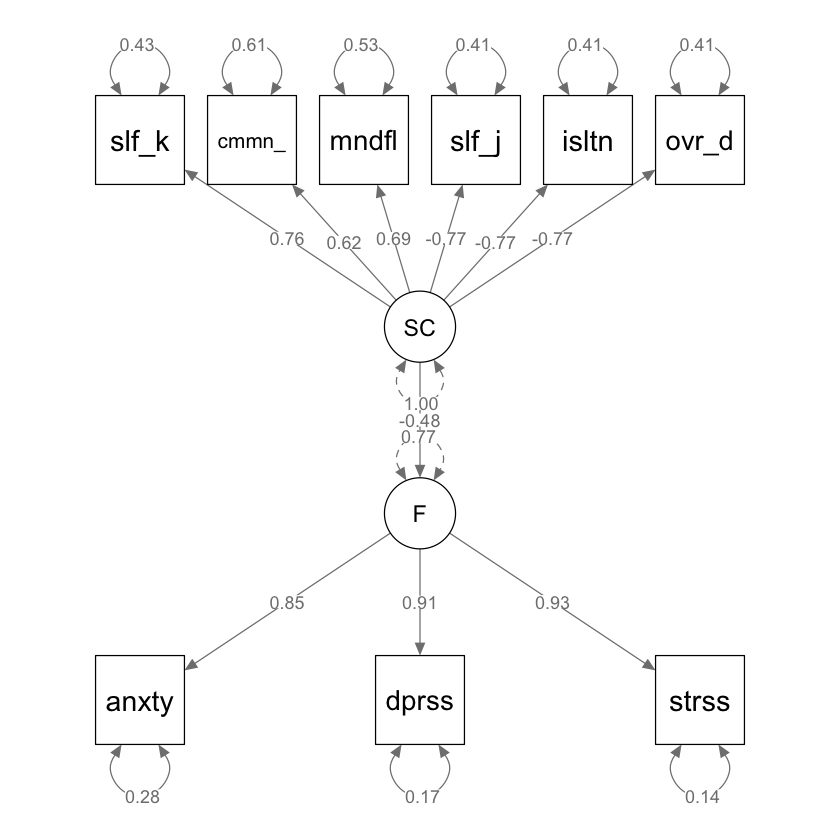

In [62]:
semPaths(fit_sc,
    whatLabels = "std",
    sizeMan = 10,
    edge.label.cex = 0.9,
    style = "mx",
    nCharNodes = 5, nCharEdges = 0, 
    fade=FALSE
)

I coefficienti stimati nel modello SEM appaiono coerenti e in linea con le aspettative, in particolare il coefficiente che descrive l'effetto "causale" del fattore dell'autocompassione sul malessere psicologico, che si attesta a -0.48. Questo valore negativo corrobora l'ipotesi secondo cui l'autocompassione svolge un ruolo di fattore protettivo contro il malessere psicologico. Tuttavia, prima di confermare definitivamente questa conclusione, è cruciale esaminare gli indici di bontà di adattamento del modello. Questi indici ci permetteranno di valutare quanto accuratamente il modello SEM si adatta ai dati osservati, fornendo un quadro più chiaro della validità delle nostre inferenze. In altre parole, sebbene il modello suggerisca una relazione negativa tra autocompassione e malessere psicologico, la conferma finale di questa associazione dipenderà dall'adeguatezza complessiva del modello rispetto ai dati. Questo argomento verrà affrontato nel prossimo capitolo.

## Impiego delle Medie nei Modelli SEM

Nei modelli di equazioni strutturali (SEM), come nell'analisi fattoriale, l'accento è posto sull'analisi delle covarianze tra variabili. Tuttavia, a differenza dell'analisi fattoriale, i modelli SEM consentono di includere anche le medie delle variabili osservate e latenti. Questo arricchisce l'analisi, fornendo informazioni preziose in molti contesti, come nei modelli CFA longitudinali, dove le ipotesi centrali riguardano proprio le medie dei costrutti.

### Struttura delle Medie nel Modello SEM

L'equazione generale per la struttura delle medie in un modello SEM è la seguente:

$$ 
E(y) = \mu_y = T + \Lambda A 
$$

dove:

- \( y \) indica i punteggi degli indicatori.
- \( E(y) \) rappresenta la media attesa di \( y \).
- \( \mu_y \) è il vettore delle medie dei modelli degli indicatori, analogo a \( \Sigma \) nelle strutture di covarianza.
- \( \Lambda \) è la matrice dei carichi fattoriali, che stima le relazioni degli indicatori con i costrutti.
- \( T \) è il vettore delle medie degli indicatori.
- \( A \) è un vettore delle medie dei costrutti latenti.

In un diagramma a percorsi, un triangolo contrassegnato con il numero 1 rappresenta la costante di regressione. Questo simbolo indica l'intercetta, che viene utilizzata per stimare la media quando una variabile viene regredita su di essa.

La media di ciascun indicatore è stimata nel vettore \( \tau \), mentre \( \Lambda \) rappresenta la matrice di saturazioni fattoriali del modello di misurazione CFA. Questo collegamento tra i carichi e le medie indica che gli indicatori con carichi più elevati hanno un impatto maggiore sulla media del costrutto.

Il simbolo \( \alpha \) rappresenta le medie stimate dei costrutti latenti. Questa simbologia aiuta a distinguere tra le medie degli indicatori (\( \tau \)) e quelle dei costrutti latenti (\( \alpha \)) nelle equazioni.

### Vincoli e Scalatura delle Medie

Similmente alla gestione delle strutture di covarianza nei modelli SEM, anche per le strutture delle medie è necessario impostare un vincolo per definire la scala. Per le medie, lo zero viene spesso adottato come riferimento. Stabilire questo vincolo aiuta a calcolare le distanze dai punti fissati, che possono essere sia positive sia negative.

### Stima delle Intercette con `lavaan`

Per stimare le intercette in un modello SEM, è essenziale avere accesso ai dati originali o a una matrice di covarianza, oltre alle medie di tutte le variabili coinvolte. L'utilizzo del software `lavaan` facilita questo processo. Impostando `meanstructure = true`, si indica a `lavaan` di integrare automaticamente una costante "1" in tutte le equazioni del modello, facilitando il calcolo delle intercette per le variabili endogene. Questo permette di calcolare con precisione le intercette, che sono cruciali per il modello delle strutture delle medie.

In conclusione, la struttura delle medie in un modello SEM è essenziale per ottenere stime accurate delle medie delle variabili, permettendo di confrontare queste stime con le medie osservate nei dati raccolti, proprio come si confrontano le covarianze nel modello con quelle osservate nei dati. Questo approccio arricchisce significativamente l'analisi fornita dai modelli SEM.

## Considerazioni Conclusive

In questo capitolo, abbiamo esplorato i Modelli di Equazioni Strutturali (SEM), evidenziando come questi modelli non si limitino a descrivere le correlazioni tra variabili osservabili, ma permettano anche di analizzare le relazioni tra variabili latenti. La forza dei SEM risiede nella loro capacità di integrare il modello di misurazione, che definisce le relazioni tra gli indicatori e le variabili latenti, con il modello strutturale, che esamina le interazioni tra le stesse variabili latenti.

Nei prossimi capitoli, approfondiremo vari aspetti della modellazione SEM. Esamineremo la bontà di adattamento del modello, un criterio fondamentale per verificare la fedeltà con cui il modello riflette la realtà osservata. Analizzeremo anche il confronto tra modelli alternativi, un passaggio cruciale per identificare il modello che migliora l'interpretazione dei dati.

Un altro tema importante sarà l'analisi dell'applicabilità dei modelli a gruppi diversi, vitale per valutare la loro generalizzabilità e la pertinenza in contesti specifici. Inoltre, discuteremo le sfide metodologiche legate alla gestione di dati categoriali, all'implementazione di modelli SEM multilivello e alla gestione di dati mancanti. Questi approfondimenti ci permetteranno di comprendere meglio come i modelli SEM possono essere adattati e applicati efficacemente in diversi ambiti di ricerca.

## Session Info

In [35]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: aarch64-apple-darwin20 (64-bit)
Running under: macOS Sonoma 14.4.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.11.0

locale:
[1] C

time zone: Europe/Rome
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] effectsize_0.8.7   rsvg_2.6.0         DiagrammeRsvg_0.1  mvnormalTest_1.0.0
 [5] lavaanExtra_0.2.0  ggokabeito_0.1.0   viridis_0.6.5      viridisLite_0.4.2 
 [9] ggpubr_0.6.0       ggExtra_0.10.1     bayesplot_1.11.1   gridExtra_2.3     
[13] patchwork_1.2.0    semTools_0.5-6     semPlot_1.1.6      lavaan_0.6-17     
[17] psych_2.4.3        scales_1.3.0       markdown_1.12      knitr_1.45        
[21] lubridate_1.9.3    forcats_1.0.0      stringr_1.5.1      dplyr_1.